In [2]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
data = pd.read_csv("heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
X = data.drop('target',axis = 1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [8]:
y = data['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [9]:
# Train SVM
clf = svm.SVC(C=1.0, kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

In [10]:
# Get the weights and bias
w = clf.coef_[0]
b = clf.intercept_[0]

print(f'Weight vector: {w}')
print("-------------------------------------------------------------------------------")
print(f'Bias: {b}')

Weight vector: [ 0.00498881 -0.99109076  0.67814208 -0.01550331 -0.0016035   0.16658103
  0.12191999  0.01327349 -0.61014601 -0.45883217  0.41714419 -0.51252065
 -0.85415364]
-------------------------------------------------------------------------------
Bias: 2.729020798563154


In [11]:
# Step 4: Get the hyperplane parameters
w = clf.coef_[0]
b = clf.intercept_[0]

# Convert DataFrame to NumPy array
print(min(X.iloc[:, 0]),"--------|---------", max(X.iloc[:, 0]))

# OR explicitly use NumPy conversion
print(min(X.values[:, 0]),"--------|---------", max(X.values[:, 0]))

29 --------|--------- 77
29.0 --------|--------- 77.0


In [12]:
#Normalization same as Standard Scaler

x_points = np.linspace(min(X.iloc[:, 0]), max(X.iloc[:, 0]), 20)
# Decision boundary: w0 * x + w1 * y + b = 0 => y = -(w0/w1) * x - b/w1
print(-(w[0] / w[1]),-b / w[1])
y_points = -(w[0] / w[1]) * x_points - b / w[1]

#y_points = np.linspace(min(X[:, 1]), max(X[:, 1]), 20)
print(x_points)
print(y_points)

0.005033651814534332 2.7535528599804975
[29.         31.52631579 34.05263158 36.57894737 39.10526316 41.63157895
 44.15789474 46.68421053 49.21052632 51.73684211 54.26315789 56.78947368
 59.31578947 61.84210526 64.36842105 66.89473684 69.42105263 71.94736842
 74.47368421 77.        ]
[2.89952876 2.91224536 2.92496195 2.93767854 2.95039514 2.96311173
 2.97582833 2.98854492 3.00126152 3.01397811 3.0266947  3.0394113
 3.05212789 3.06484449 3.07756108 3.09027767 3.10299427 3.11571086
 3.12842746 3.14114405]


[[ 0.00498881 -0.99109076  0.67814208 -0.01550331 -0.0016035   0.16658103
   0.12191999  0.01327349 -0.61014601 -0.45883217  0.41714419 -0.51252065
  -0.85415364]]
[[2.48881834e-05 9.82260896e-01 4.59876678e-01 2.40352718e-04
  2.57122768e-06 2.77492385e-02 1.48644833e-02 1.76185519e-04
  3.72278150e-01 2.10526957e-01 1.74009277e-01 2.62677415e-01
  7.29578435e-01]]
3.23426552690563
1.7984063853605585
0.5560478477724667


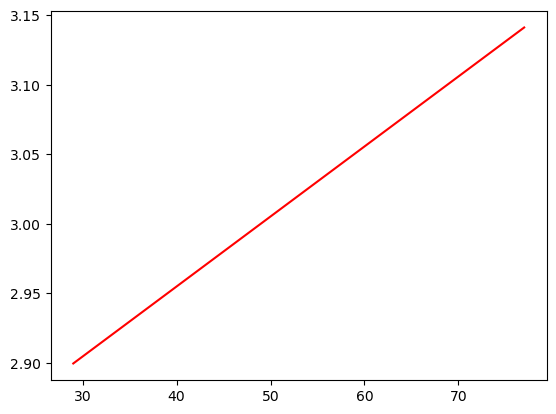

In [13]:
# Step 5: Plot the decision boundary (hyperplane) line 
plt.plot(x_points, y_points, color='red')
print(clf.coef_)
print(clf.coef_**2)
print(np.sum(clf.coef_ ** 2))
print(np.sqrt(np.sum(clf.coef_ ** 2)))

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
print(margin)

[3.45557661 3.4682932  3.4810098  3.49372639 3.50644299 3.51915958
 3.53187617 3.54459277 3.55730936 3.57002596 3.58274255 3.59545915
 3.60817574 3.62089233 3.63360893 3.64632552 3.65904212 3.67175871
 3.6844753  3.6971919 ]
[2.34348091 2.35619751 2.3689141  2.3816307  2.39434729 2.40706389
 2.41978048 2.43249707 2.44521367 2.45793026 2.47064686 2.48336345
 2.49608004 2.50879664 2.52151323 2.53422983 2.54694642 2.55966301
 2.57237961 2.5850962 ]
[56. 48. 58. 58. 64. 61. 58. 44. 50. 41. 51. 60. 46. 65. 44. 52. 59. 57.
 39. 61. 62. 65. 59. 64. 47. 58. 35. 59. 48. 66. 54. 59. 62. 38. 52. 63.
 66. 49. 46. 61. 67. 58. 57. 58. 42. 52. 59. 40. 59. 57. 61. 67. 44. 63.
 57. 45. 57. 37. 57. 52. 54. 43. 59. 61. 40. 71. 53. 65. 54. 51. 54. 45.
 53. 66. 62. 52. 54. 51. 54. 51. 51. 51. 59. 58. 42. 67. 68. 58. 57. 52.
 53. 62. 52. 43. 53. 59. 42. 45. 64. 43. 41. 56. 46. 64. 59. 47. 74. 57.
 64. 43. 70. 66. 71. 64. 58. 58. 56. 38. 38.] [1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.

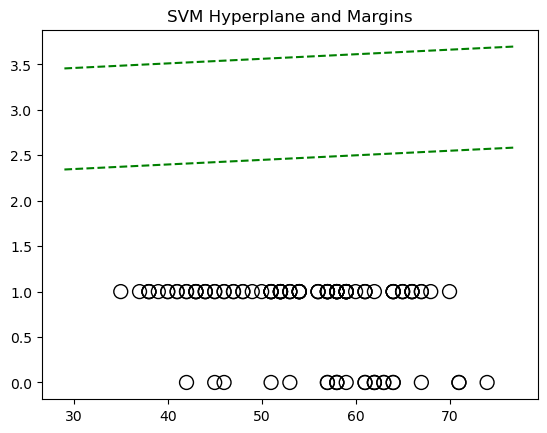

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0
 1 0 0 1 0 0 1]


In [14]:
y_points_margin_pos = y_points + margin
print(y_points_margin_pos)
y_points_margin_neg = y_points - margin
print(y_points_margin_neg)

plt.plot(x_points, y_points_margin_pos, 'g--')
plt.plot(x_points, y_points_margin_neg, 'g--')

print(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1])

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
             facecolors='none', edgecolors='k')

plt.title('SVM Hyperplane and Margins')
plt.show()

y_pred = clf.predict(X)
print(y_pred)
#print(y)

In [18]:
# Calculate accuracy score
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

import numpy as np
new_data = np.array([5, 6] + [0] * 11).reshape(1, -1)  # Add dummy values to match 13 features
new_y_predict = clf.predict(new_data)
print(f"Heart Attack Prediction [1/0 ]:{new_y_predict}")

Accuracy: 0.85
Confusion Matrix:
[[106  32]
 [ 12 153]]
Heart Attack Prediction [1/0 ]:[0]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [16]:
import pickle

with open("heart_disease_model.pkl", "wb") as f:
    pickle.dump(clf, f)
print("Model saved as heart_disease_model.pkl")

Model saved as heart_disease_model.pkl
